In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's load titanic data set
titanic=pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary
Survived: 0 = No, 1 = Yes

Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Brief information about each columns of the dataset:


Passenger Id: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

Sex: Passenger's sex. It's either Male or Female.

Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

SibSp: Number of siblings or spouses travelling with each passenger.

Parch: Number of parents of children travelling with each passenger.

Ticket: Ticket number.

Fare: How much money the passenger has paid for the travel journey.

Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

Embarked: Port from where the particular passenger was embarked/boarded.

In [4]:
#Let's check the shape of our data set
titanic.shape

(891, 12)

# Exploratory Data Analysis

In [5]:
#Let's begin with our EDA
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that Age, cabin, embarked columns have missing values

In [7]:
# lets fillup missiing values
titanic.Embarked.mode()

0    S
dtype: object

In [8]:
titanic['Embarked'].fillna('S',inplace=True)

For age column lets fill missing values by mean age

In [9]:
titanic.Age.mean()


29.69911764705882

In [10]:
titanic['Age'].fillna('29.0',inplace=True)

In [11]:
# columns like cabin, name and ticket are not required. so lets drop the unnecessary columns

In [12]:
titanic=titanic.drop(['Name','Cabin','Ticket'],axis=1)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


here we can see that all missing values are filled up.

In [14]:
#Print the unique values in the column
print(titanic['Sex'].unique)
print(titanic['Embarked'].unique)

<bound method Series.unique of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>
<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


In [16]:
# Lets give codes to data

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Encode Sex column
titanic.iloc[:,3]=le.fit_transform(titanic.iloc[:,3].values)

#Encode Embarked column
titanic.iloc[:,8]=le.fit_transform(titanic.iloc[:,8].values)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [18]:
#Print the unique values in the column
print(titanic['Sex'].unique)
print(titanic['Embarked'].unique)

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32>
<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32>


In [ ]:
# Visualization of data using heat maps

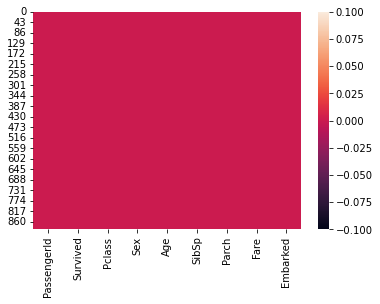

In [19]:
sns.heatmap(titanic.isnull())
plt.show()

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


we can see that dataset has no null values

In [21]:
#let's check the correlation matrix
titanic.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.108262
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

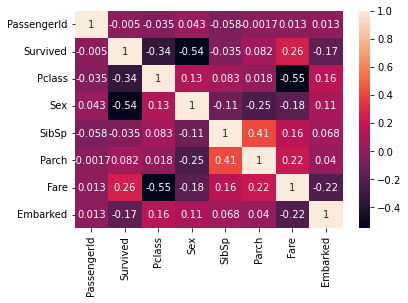

In [22]:
cor=titanic.corr()
sns.heatmap(cor,annot=True)

In [23]:
#Let's describe the matrix
titanic.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,2.000000


In [24]:
# Let's look at numeric and categotical values seprately
titanic_num = titanic[['Fare','SibSp','Parch']]
titanic_cat = titanic[['Survived','Pclass','Sex','Embarked']]

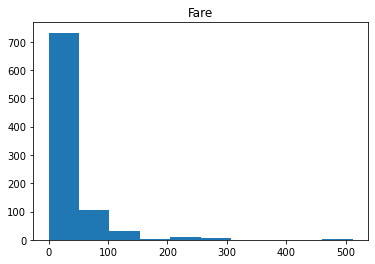

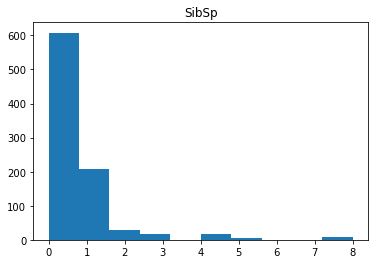

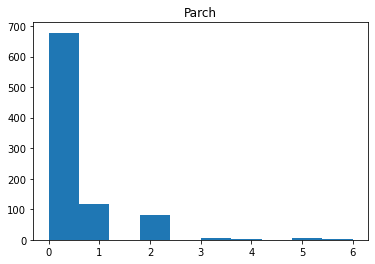

In [25]:
# Let's check the distribution of all numeric variables
for i in titanic_num.columns:
    plt.hist(titanic_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

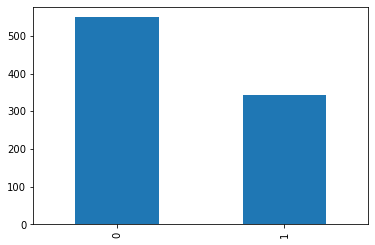

In [26]:
%matplotlib inline

alpha_color=0.5
titanic['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

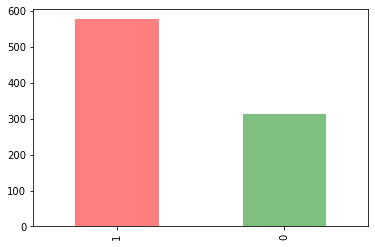

In [27]:
titanic['Sex'].value_counts().plot(kind='bar',color=['r','g'],alpha=alpha_color)


<AxesSubplot:>

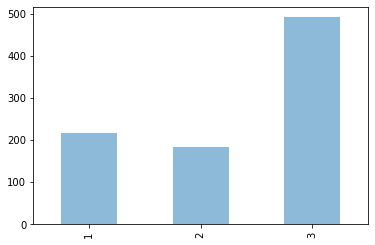

In [28]:
titanic['Pclass'].value_counts().sort_index().plot(kind='bar',alpha=alpha_color)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

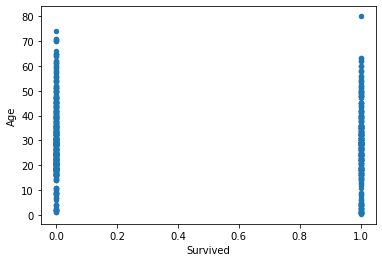

In [29]:
titanic.plot(kind='scatter',x='Survived',y='Age')

# Lets check whether passengers in 1st class have servived or not.

<AxesSubplot:>

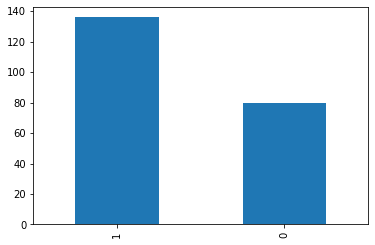

In [30]:
titanic[titanic['Pclass'] == 1]['Survived'].value_counts().plot(kind='bar')

Graph shows that large number of passengers in 1st class have servived.

# Lets check whether passengers in 3rd class have servived or not.¶

<AxesSubplot:>

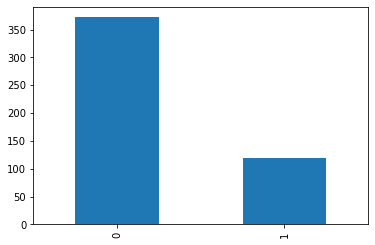

In [31]:
titanic[titanic['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar')

Graph shows that large number of passengers in 3rd class have not servived.

# Lets go for sexwise analysis of passengers for survival

<AxesSubplot:>

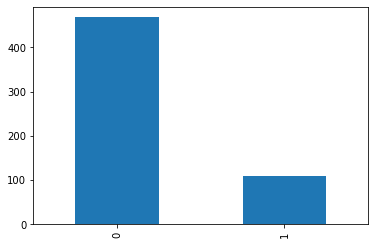

In [33]:
titanic[titanic['Sex'] == 1]['Survived'].value_counts().plot(kind='bar')


code =1 stands for male so from graph we can see that less number of male passengers have survived

<AxesSubplot:>

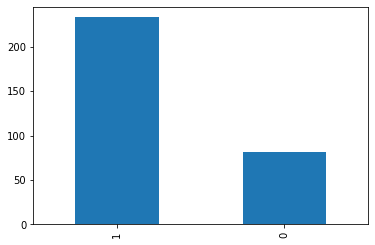

In [34]:
titanic[titanic['Sex'] == 0]['Survived'].value_counts().plot(kind='bar')

code =0 stands for female so from graph we can see that large number of female passengers have survived

# lets check in which class male passengers have survived more

<AxesSubplot:>

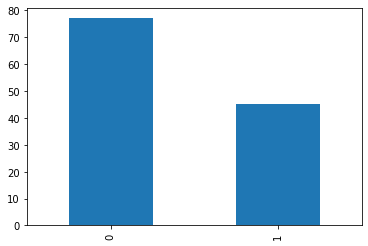

In [36]:
# lets check for class 1st
titanic[(titanic['Sex'] == 1) & (titanic['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

large number of male passengers are not able to survive in class 1st

<AxesSubplot:>

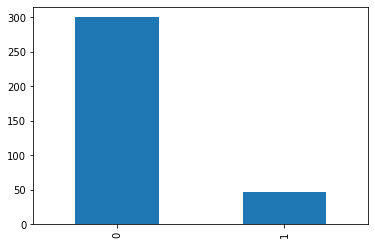

In [38]:
# lets check for class 3
titanic[(titanic['Sex'] == 1) & (titanic['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

large number of male passengers are not able to survive in class 3rd

form both the graphs we can conclude that male are unable to survive in both the classes.

# lets check in which class female passengers have survived more

<AxesSubplot:>

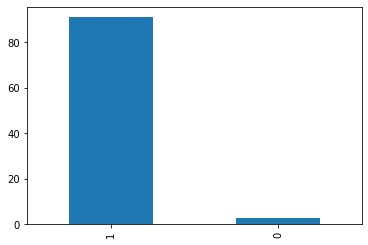

In [40]:
# lets check for class 1st
titanic[(titanic['Sex'] == 0) & (titanic['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

from graph we can say that almost all females have not survived in class 1st

<AxesSubplot:>

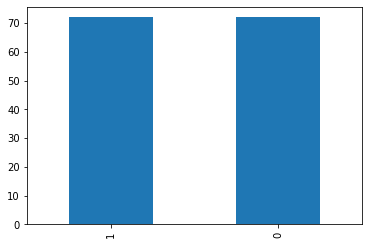

In [41]:
#lets check for class 3rd
titanic[(titanic['Sex'] == 0) & (titanic['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

from graph we can say that numbers of male and female passengers survived in class 3rd are almost equal.

# Spliting of the data

In [43]:
#Let's split the data into 'x' independent and 'y' dependent variables
x=titanic.iloc[:,2:8].values
y=titanic.iloc[:,1].values

In [44]:
# Let's split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling of the data

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [58]:
# Let's create a funtion with machine learing  model

def models(x_train, y_train):
    # use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)

    #use KNEighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(Linear Kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decission Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
     #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy',log.score(x_train,y_train))
    print('[1]K Neighbor Training Accuracy',knn.score(x_train,y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Training Accuracy',gauss.score(x_train,y_train))
    print('[5]Decission Tree Training Accuracy',tree.score(x_train,y_train))
    print('[6]Random Forest Training Accuracy',forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [59]:
#Let's get and train all of the model

model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy 0.7991573033707865
[1]K Neighbor Training Accuracy 0.8679775280898876
[2]SVC Linear Training Accuracy 0.7865168539325843
[3]SVC RBF Training Accuracy 0.8370786516853933
[4]Gaussian NB Training Accuracy 0.7893258426966292
[5]Decission Tree Training Accuracy 0.9775280898876404
[6]Random Forest Training Accuracy 0.9648876404494382


In [60]:
# Show the confusion matrix and accuracy for all the models on the test data

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    ac=accuracy_score(y_test,model[i].predict(x_test))
    cr=classification_report(y_test,model[i].predict(x_test))
    
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(x_test)).ravel()
    
    test_score=(TP+TN) / (TP+TN+FN+FP)
    
    
    print(cm)
    print(ac)
    print(cr)
    print('Model [{}] Testing Accuracy = "{}"'.format(i,test_score))
    print('\n')
    
    

[[97 13]
 [21 48]]
0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

Model [0] Testing Accuracy = "0.8100558659217877"


[[96 14]
 [21 48]]
0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Model [1] Testing Accuracy = "0.8044692737430168"


[[92 18]
 [20 49]]
0.7877094972067039
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       

In [61]:
#Let's check the model and prediction values of RandomForestclassifier

pred=model[6].predict(x_test)
print(pred)
print("Predicted Values")

print('\n')

#Print the actuacl values
print(y_test)
print('Actual Values')

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
Predicted Values


[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
Actual Values


In [62]:
#from sklearn.externals import joblib
import joblib

# save the model as pickle in a file
joblib.dump(models,'titanic.pkl')

['titanic.pkl']